# Análise sobre benefícios a serem concedidos aos lojistas

## Dúvida da área de negócios
* **Podemos dar os mesmos benefícios para todos os lojistas (sellers)? Ou existe algum que merece destaque?**

* **Resposta:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
from datetime import datetime

In [2]:
%matplotlib inline

from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

## Carregando bases de dados

In [3]:
df_customers = pd.read_csv('datasets/olist_customers_dataset.csv', encoding='ISO-8859-1')
df_geolocation = pd.read_csv('datasets/olist_geolocation_dataset.csv', encoding='ISO-8859-1')
df_order_items = pd.read_csv('datasets/olist_order_items_dataset.csv', encoding='ISO-8859-1')
df_order_payments = pd.read_csv('datasets/olist_order_payments_dataset.csv', encoding='ISO-8859-1')
df_order_reviews = pd.read_csv('datasets/olist_order_reviews_dataset.csv', encoding='ISO-8859-1')
df_orders = pd.read_csv('datasets/olist_orders_dataset.csv', encoding='ISO-8859-1')
df_products = pd.read_csv('datasets/olist_products_dataset.csv', encoding='ISO-8859-1')
df_sellers = pd.read_csv('datasets/olist_sellers_dataset.csv', encoding='ISO-8859-1')
df_product_category_name_translation = pd.read_csv('datasets/product_category_name_translation.csv', encoding='ISO-8859-1')

## Base de Clientes

In [4]:
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


## Base de Lojistas

In [5]:
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## Base de Geolocalizações

In [6]:
df_geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


## Base de Pedidos

In [7]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [53]:
order_estimated_delivery = datetime.strptime(df_orders[df_orders['order_id'] == '0ddd5a236d9e9023c6b2dc4e0ae35efe']['order_estimated_delivery_date'].unique()[0] , '%Y-%m-%d %H:%M:%S')
order_approved_at = datetime.strptime(df_orders[df_orders['order_id'] == '0ddd5a236d9e9023c6b2dc4e0ae35efe']['order_approved_at'].unique()[0], '%Y-%m-%d %H:%M:%S')


        

data_1_h = datetime.strptime(data_1, '%Y-%m-%d %H:%M:%S')
data_2_h = datetime.strptime(data_2, '%Y-%m-%d %H:%M:%S')
data = order_estimated_delivery - order_approved_at

print(data.days)


20


In [64]:
print(datetime.strptime(df_orders[df_orders['order_id'] == '58ab05a43a2649047ae3906759cea594']['order_approved_at'].unique()[0],  '%Y-%m-%d %H:%M:%S'))
print(df_orders[df_orders['order_id'] == '0ddd5a236d9e9023c6b2dc4e0ae35efe']['order_estimated_delivery_date'].unique()[0])

2017-10-09 07:12:04
2018-04-17 00:00:00


In [96]:
data_1 = pd.to_datetime(df_orders[df_orders['order_id'] == '58ab05a43a2649047ae3906759cea594']['order_approved_at'], format='%Y-%m-%d %H:%M:%S')
data_2 = pd.to_datetime(df_orders[df_orders['order_id'] == '58ab05a43a2649047ae3906759cea594']['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')
date = data_2 - data_1
print(date.dt.days.unique()[0])

24


## Itens do pedido

In [9]:
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## Forma de pagamento de cada pedido

In [10]:
df_order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


## Retorno de clientes sobre a compra realizada

In [11]:
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,ParabÃ©ns lojas lannister adorei comprar pela ...,2018-03-01 00:00:00,2018-03-02 10:26:53


## Dados cadastrais de cada produto

In [12]:
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


## Tradução das categorias de produtos

In [13]:
df_product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [131]:
df_rank_sellers = pd.DataFrame(columns=['seller_id', 'count_orders', 'count_products','sum_price_orders', 'count_orders_delivered',
                                        'count_review_score_5', 'count_review_score_4', 'count_review_score_3', 'count_review_score_2', 
                                        'count_review_score_1', 'count_early_delivery', 'count_late_delivery'])

In [ ]:
from IPython.display import clear_output

for seller_id in df_sellers['seller_id']:
    count_orders = len(df_order_items[df_order_items['seller_id'] == seller_id]['order_id'].unique())
    count_products = df_order_items[df_order_items['seller_id'] == seller_id]['order_id'].count()
    sum_price_orders = round(df_order_items[df_order_items['seller_id'] == seller_id]['price'].sum(),2)
    
    count_orders_delivered = 0
    count_review_score_5 = 0
    count_review_score_4 = 0
    count_review_score_3 = 0
    count_review_score_2 = 0
    count_review_score_1 = 0
    order_estimated_delivery_days = 0
    order_delivered_customer_days = 0
    count_early_delivery = 0
    count_late_delivery = 0
    
    for order_id in df_order_items[df_order_items['seller_id'] == seller_id]['order_id'].unique():
        order_estimated_delivery_date = pd.to_datetime(df_orders[df_orders['order_id'] ==  order_id]['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')
        order_approved_at = pd.to_datetime(df_orders[df_orders['order_id'] ==  order_id]['order_approved_at'], format='%Y-%m-%d %H:%M:%S')
        order_delivered_customer_date = pd.to_datetime(df_orders[df_orders['order_id'] ==  order_id]['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')
        
        order_estimated_delivery_days = order_estimated_delivery_date - order_approved_at
        order_delivered_customer_days = order_delivered_customer_date - order_approved_at
        
        if order_estimated_delivery_days.dt.days.unique()[0] > order_delivered_customer_days.dt.days.unique()[0]:
            count_early_delivery += 1
            
        else:
            count_late_delivery += 1
        
        if df_orders[df_orders['order_id'] == order_id]['order_status'].str.contains('delivered').item():
            count_orders_delivered += 1
            
        count_review_score_5 += len(df_order_reviews[(df_order_reviews['order_id'] == order_id) & (df_order_reviews['review_score'] == 5)])
        count_review_score_4 += len(df_order_reviews[(df_order_reviews['order_id'] == order_id) & (df_order_reviews['review_score'] == 4)])
        count_review_score_3 += len(df_order_reviews[(df_order_reviews['order_id'] == order_id) & (df_order_reviews['review_score'] == 3)])
        count_review_score_2 += len(df_order_reviews[(df_order_reviews['order_id'] == order_id) & (df_order_reviews['review_score'] == 2)])
        count_review_score_1 += len(df_order_reviews[(df_order_reviews['order_id'] == order_id) & (df_order_reviews['review_score'] == 1)])
        
        
    
    df_rank_sellers = df_rank_sellers.append({'seller_id':seller_id,
                                              'count_orders':count_orders,
                                              'count_products':count_products,
                                             'sum_price_orders':sum_price_orders,
                                             'count_orders_delivered':count_orders_delivered,
                                             'count_review_score_5':count_review_score_5,
                                             'count_review_score_4':count_review_score_4,
                                             'count_review_score_3':count_review_score_3,
                                             'count_review_score_2':count_review_score_2,
                                             'count_review_score_1':count_review_score_1,
                                             'count_early_delivery':count_early_delivery,
                                             'count_late_delivery':count_late_delivery}, ignore_index=True)

In [140]:
df_rank_sellers.to_csv('datasets/df_rank_sellers.csv')

In [190]:
df_rank_sellers.sort_values(by=['sum_price_orders'], ascending=False, inplace=True)
df_rank_sellers.reset_index(inplace=True)

In [192]:
df_rank_sellers.head()

,level_0,index,seller_id,count_orders,count_products,sum_price_orders,count_orders_delivered,count_review_score_5,count_review_score_4,count_review_score_3,count_review_score_2,count_review_score_1,count_early_delivery,count_late_delivery
0,0,4994,4869f7a5dfa277a7dca6462dcf3b52b2,1132,1156,229472.63,1124,672,205,100,32,123,981,151
1,1,901,53243585a1d6dc2643021fd1853d8905,358,410,222776.05,348,200,81,33,9,35,330,28
2,2,4840,4a3ca9315b744ce9f8e9374361493884,1806,1987,200472.92,1772,869,357,236,91,269,1560,246
3,3,557,fa1c13f2614d7b5c4749cbc52fecda94,585,586,194042.03,578,394,103,25,11,52,514,71
4,4,1182,7c67e1448b00f6e969d365cea6b010ab,982,1364,187923.89,973,346,240,147,57,198,861,121


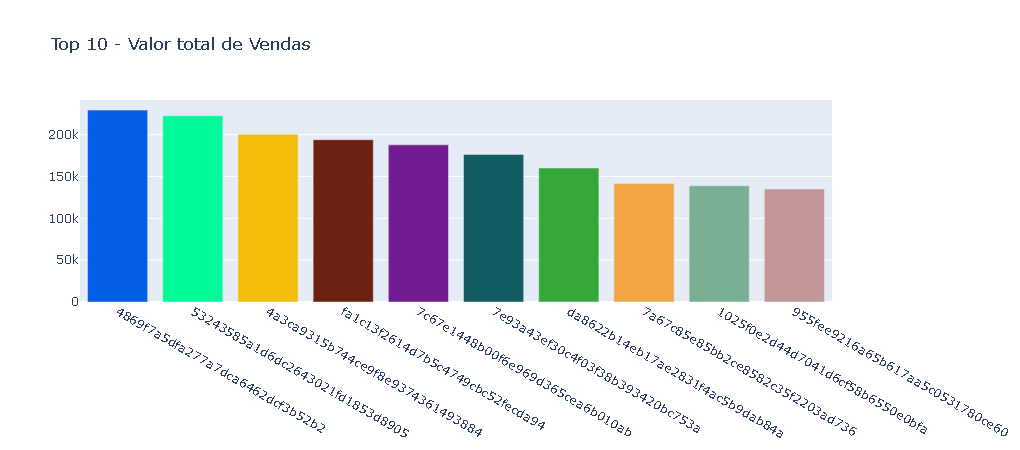

In [211]:
perc = [go.Bar(x = df_rank_sellers['seller_id'].head(10), y=df_rank_sellers['sum_price_orders'].head(10), 
               marker=dict(color=['#035ee8', '#00fa9a', '#f4bd0c', '#6c2111', '#711c91',
                                 '#115d61', '#36a738', '#f2a343', '#79af92', '#c39797']))]

layout = go.Layout( title='Top 10 - Valor total de Vendas')

fig = go.Figure(data=perc, layout=layout)

py.iplot(fig, filename='color-bar')


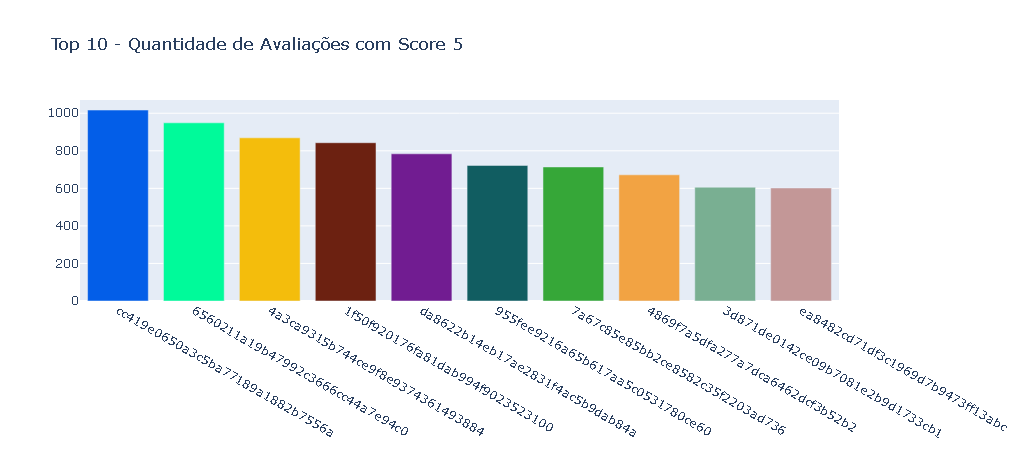

In [217]:
perc = [go.Bar(x = df_rank_sellers.sort_values(by=['count_review_score_5'], ascending=False)['seller_id'].head(10), 
               y=df_rank_sellers.sort_values(by=['count_review_score_5'], ascending=False)['count_review_score_5'].head(10), 
               marker=dict(color=['#035ee8', '#00fa9a', '#f4bd0c', '#6c2111', '#711c91',
                                 '#115d61', '#36a738', '#f2a343', '#79af92', '#c39797']))]

layout = go.Layout( title='Top 10 - Quantidade de Avaliações com Score 5')

fig = go.Figure(data=perc, layout=layout)

py.iplot(fig, filename='color-bar')

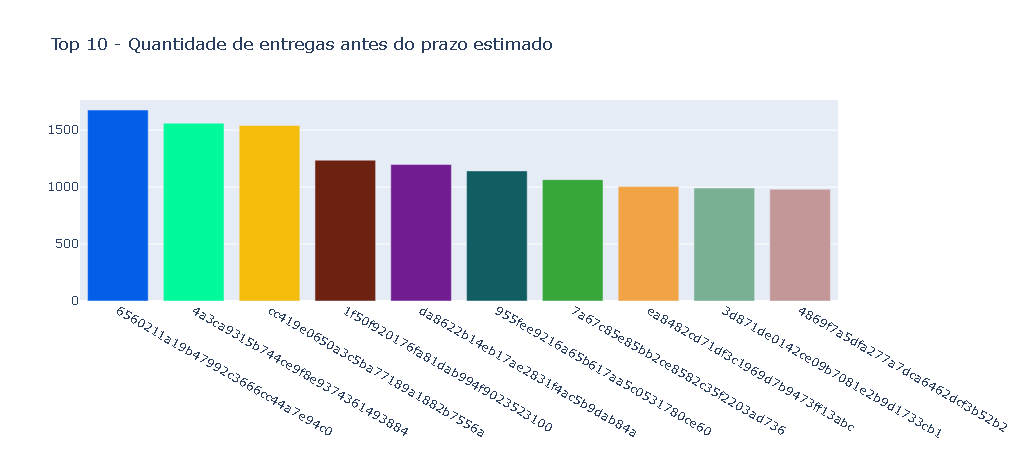

In [216]:
perc = [go.Bar(x = df_rank_sellers.sort_values(by=['count_early_delivery'], ascending=False)['seller_id'].head(10), 
               y=df_rank_sellers.sort_values(by=['count_early_delivery'], ascending=False)['count_early_delivery'].head(10), 
               marker=dict(color=['#035ee8', '#00fa9a', '#f4bd0c', '#6c2111', '#711c91',
                                 '#115d61', '#36a738', '#f2a343', '#79af92', '#c39797']))]

layout = go.Layout( title='Top 10 - Quantidade de entregas antes do prazo estimado')

fig = go.Figure(data=perc, layout=layout)

py.iplot(fig, filename='color-bar')

In [255]:
df_rank_sellers_score = pd.DataFrame(columns=['seller_id', 'percent_score_5', 'percent_score_4', 
                                              'percent_score_3', 'percent_score_2', 'percent_score_1'])

In [256]:
for seller in df_rank_sellers['seller_id'].head(10):
    total_review_score = int(df_rank_sellers[df_rank_sellers['seller_id'] == seller]['count_review_score_5']) + \
                         int(df_rank_sellers[df_rank_sellers['seller_id'] == seller]['count_review_score_4']) + \
                         int(df_rank_sellers[df_rank_sellers['seller_id'] == seller]['count_review_score_3']) + \
                         int(df_rank_sellers[df_rank_sellers['seller_id'] == seller]['count_review_score_2']) + \
                         int(df_rank_sellers[df_rank_sellers['seller_id'] == seller]['count_review_score_1'])
    
    percent_score_5 = int(df_rank_sellers[df_rank_sellers['seller_id'] == seller]['count_review_score_5']) / total_review_score * 100
    percent_score_4 = int(df_rank_sellers[df_rank_sellers['seller_id'] == seller]['count_review_score_4'])/ total_review_score * 100
    percent_score_3 = int(df_rank_sellers[df_rank_sellers['seller_id'] == seller]['count_review_score_3']) / total_review_score * 100
    percent_score_2 = int(df_rank_sellers[df_rank_sellers['seller_id'] == seller]['count_review_score_2']) / total_review_score * 100
    percent_score_1 = int(df_rank_sellers[df_rank_sellers['seller_id'] == seller]['count_review_score_1']) / total_review_score * 100
    
    df_rank_sellers_score = df_rank_sellers_score.append({'seller_id':seller,
                                 'percent_score_5':percent_score_5,
                                 'percent_score_4':percent_score_4,
                                 'percent_score_3':percent_score_3,
                                 'percent_score_2':percent_score_2,
                                 'percent_score_1':percent_score_1},ignore_index=True)
    
df_rank_sellers_score = round(df_rank_sellers_score,2)

In [257]:
df_rank_sellers_score

,seller_id,percent_score_5,percent_score_4,percent_score_3,percent_score_2,percent_score_1
0,4869f7a5dfa277a7dca6462dcf3b52b2,59.36,18.11,8.83,2.83,10.87
1,53243585a1d6dc2643021fd1853d8905,55.87,22.63,9.22,2.51,9.78
2,4a3ca9315b744ce9f8e9374361493884,47.69,19.59,12.95,4.99,14.76
3,fa1c13f2614d7b5c4749cbc52fecda94,67.35,17.61,4.27,1.88,8.89
4,7c67e1448b00f6e969d365cea6b010ab,35.02,24.29,14.88,5.77,20.04
5,7e93a43ef30c4f03f38b393420bc753a,62.80,17.56,7.44,1.79,10.42
6,da8622b14eb17ae2831f4ac5b9dab84a,58.90,20.21,8.87,3.31,8.72
7,7a67c85e85bb2ce8582c35f2203ad736,61.34,18.90,8.59,3.35,7.82
8,1025f0e2d44d7041d6cf58b6550e0bfa,54.88,19.41,7.70,4.12,13.88
9,955fee9216a65b617aa5c0531780ce60,56.01,22.89,9.31,3.10,8.69


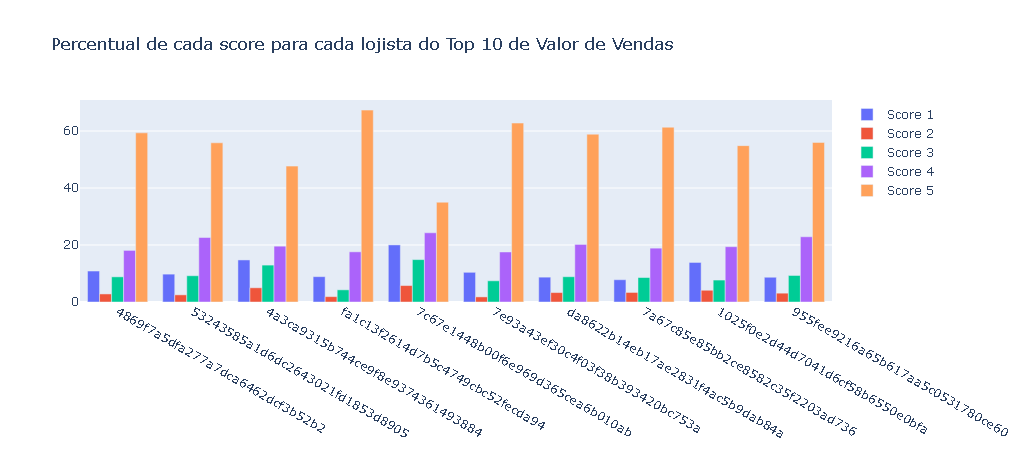

In [262]:
score_5 = go.Bar(x=df_rank_sellers_score['seller_id'], y=df_rank_sellers_score['percent_score_5'], name='Score 5')
score_4 = go.Bar(x=df_rank_sellers_score['seller_id'], y=df_rank_sellers_score['percent_score_4'], name='Score 4')
score_3 = go.Bar(x=df_rank_sellers_score['seller_id'], y=df_rank_sellers_score['percent_score_3'], name='Score 3')
score_2 = go.Bar(x=df_rank_sellers_score['seller_id'], y=df_rank_sellers_score['percent_score_2'], name='Score 2')
score_1 = go.Bar(x=df_rank_sellers_score['seller_id'], y=df_rank_sellers_score['percent_score_1'], name='Score 1')

scores = [score_1, score_2, score_3, score_4, score_5]

layout = go.Layout(title='Percentual de cada score para cada lojista do Top 10 de Valor de Vendas')

fig = go.Figure(data=scores, layout=layout)

py.iplot(fig)